# Pokeman Weedle's Cave

## Abstract 
---
- This notebook executes the instruction in Data Science tutorial by Kaan Can. The link to the original tutorial is https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners

## Tutorial Objective
---
Data scientist need to have these skills:
- **Basic Tools:** Like python, R or SQL. You do not need to know everything. What you only need is to learn how to use python
- **Basic Statistics:** Like mean, median or standart deviation. If you know basic statistics, you can use python easily.
- **Data Munging:** Working with messy and difficult data. Like a inconsistent date and string formatting. As you guess, python helps us.
- **Data Visualization:** Title is actually explanatory. We will visualize the data with python like matplot and seaborn libraries.
- **Machine Learning:** You do not need to understand math behind the machine learning technique. You only need is understanding basics of machine learning and learning how to implement it while using python.

## Content
---
1. Introduction to Python:
  A. Matplotlib
  B. Dictionaries
  C. Pandas
  D. Logic, control flow and filtering
  E. Loop data structures
2. Python Data Science Toolbox:
  A. User defined function
  B. Scope
  C. Nested function
  D. Default and flexible arguments
  E. Lambda function
  F. Anonymous function
  G. Iterators
  H. List comprehension
3. Cleaning Data
  A. Diagnose data for cleaning
  B. Explotary data analysis
  C. Visual exploratory data analysis
  D. Tidy data
  E. Pivoting data
  F. Concatenating data
Data types
Missing data and testing with assert
Pandas Foundation
Review of pandas
Building data frames from scratch
Visual exploratory data analysis
Statistical explatory data analysis
Indexing pandas time series
Resampling pandas time series
Manipulating Data Frames with Pandas
Indexing data frames
Slicing data frames
Filtering data frames
Transforming data frames
Index objects and labeled data
Hierarchical indexing
Pivoting data frames
Stacking and unstacking data frames
Melting data frames
Categoricals and groupby
Data Visualization
Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
Bokeh: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
Bokeh: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-2
Machine Learning
https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners/


In [383]:
import pandas as pd
import os
import string
from sklearn.model_selection import KFold
import numpy as np
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

import seaborn as sns
sns.set_style("whitegrid")

matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

os.chdir('/Users/pawanshivhare/Desktop/Kaggle Competition/pokeman/data')

from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

combats.csv
pokemon.csv
tests.csv



In [384]:
pokemon=pd.read_csv('pokemon.csv')
combats=pd.read_csv('combats.csv')
tests=pd.read_csv('tests.csv')


print(pokemon.describe())
print(pokemon.head())
#pokemon.shape[0]

              #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000  


In [385]:

# check for missing values

print(pokemon.isnull().sum())

# check if there are columns that have only one value

cname=list()
for column in pokemon:
    y=pd.Series(pokemon[column].unique())
    if (y.isnull().sum() > 0):
        if y.shape[0]==2:
            cname.append(column) 
    else:
        if y.shape[0]==1:
            cname.append(column)
print(cname)

# check if there are columns that have only one value for 90% of the observations

cname=list()
cnt=pokemon.shape[0]
for column in pokemon:
    y=pokemon[column].value_counts().reset_index().rename(columns={'index': column, column: 'freq'})
    y['flag']=np.where(y.freq/cnt>0.90,1,0);
    if y['flag'].sum()>0:
        cname.append(column)
print(cname)


#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
[]
['Legendary']


In [386]:

# check for missing values

print(combats.isnull().sum())
print(combats.shape)

# check if there are columns that have only one value

cname=list()
for column in combats:
    y=pd.Series(combats[column].unique())
    if (y.isnull().sum() > 0):
        if y.shape[0]==2:
            cname.append(column) 
    else:
        if y.shape[0]==1:
            cname.append(column)
print(cname)

# check if there are columns that have only one value for 90% of the observations

cname=list()
cnt=combats.shape[0]
for column in combats:
    y=combats[column].value_counts().reset_index().rename(columns={'index': column, column: 'freq'})
    y['flag']=np.where(y.freq/cnt>0.90,1,0);
    if y['flag'].sum()>0:
        cname.append(column)
print(cname)


First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64
(50000, 3)
[]
[]


In [387]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [388]:
#Remove observations with missing data of Type 2

#poke=pokemon[pokemon['Type 2'].isnull()==False]

# Some basic feature engineering on dataset pokemon

def mega(i):
    if i.split()[0]=="Mega": return(1)
    else: return(0)

pokemon['Type 2']=np.where(pokemon['Type 2'].isnull(),"Missing",pokemon['Type 2'])
pokemon['Legendary']=np.where(pokemon['Legendary']==True,1,0)
pokemon['Name']=np.where(pokemon['Name'].isnull(),"Missing",pokemon['Name'])
pokemon['Mega']=[mega(x) for x in pokemon['Name']]

print(pokemon.head())

   #           Name Type 1   Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass   Poison  45      49       49       65       65   
1  2        Ivysaur  Grass   Poison  60      62       63       80       80   
2  3       Venusaur  Grass   Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass   Poison  80     100      123      122      120   
4  5     Charmander   Fire  Missing  39      52       43       60       50   

   Speed  Generation  Legendary  Mega  
0     45           1          0     0  
1     60           1          0     0  
2     80           1          0     0  
3     80           1          0     1  
4     65           1          0     0  


- **Data Preparation:** we need to prepare data to run a classification model. We will consolidate the characteristics for pokemon 1 and pokemon 2 into one table. create a binary variable indicating instance when pokemon 1 won. Then predict this binary variable treating it as response

In [389]:
p1=pokemon.rename(columns={'#':'p1','Name':'p1_name','Type 1':'p1_type1','Type 2':'p1_type2','HP':'p1_hp',
                           'Attack':'p1_attack','Defense':'p1_defense','Sp. Atk':'p1_sp_atk','Sp. Def':'p1_sp_def',
                           'Speed':'p1_speed','Generation':'p1_gen','Legendary':'p1_legend','Mega':'p1_mega'})


p2=pokemon.rename(columns={'#':'p2','Name':'p2_name','Type 1':'p2_type1','Type 2':'p2_type2','HP':'p2_hp',
                           'Attack':'p2_attack','Defense':'p2_defense','Sp. Atk':'p2_sp_atk','Sp. Def':'p2_sp_def',
                           'Speed':'p2_speed','Generation':'p2_gen','Legendary':'p2_legend','Mega':'p2_mega'})


temp=combats.merge(p1,left_on='First_pokemon',right_on='p1',how='left')

print(combats.shape)
print(temp.head())
print(temp.shape)

# check for missing values

print(temp.isnull().sum())


final=temp.merge(p2,left_on='Second_pokemon',right_on='p2',how='left')

final['label']=np.where(final['Winner']==final['First_pokemon'],1,0)

print(final.head())
print(final.shape)


(50000, 3)
   First_pokemon  Second_pokemon  Winner   p1   p1_name p1_type1  p1_type2  \
0            266             298     298  266  Larvitar     Rock    Ground   
1            702             701     701  702  Virizion    Grass  Fighting   
2            191             668     668  191   Togetic    Fairy    Flying   
3            237             683     683  237    Slugma     Fire   Missing   
4            151             231     151  151   Omastar     Rock     Water   

   p1_hp  p1_attack  p1_defense  p1_sp_atk  p1_sp_def  p1_speed  p1_gen  \
0     50         64          50         45         50        41       2   
1     91         90          72         90        129       108       5   
2     55         40          85         80        105        40       2   
3     40         40          40         70         40        20       2   
4     70         60         125        115         70        55       1   

   p1_legend  p1_mega  
0          0        0  
1          1        0

In [390]:
#data visualization

colnames=final._get_numeric_data().columns.values.tolist()
print(colnames)

final["diff_hp"]=final.p1_hp-final.p2_hp
final["diff_attack"]=final.p1_attack-final.p2_attack
final["diff_defense"]=final.p1_defense-final.p2_defense
final["diff_sp_atk"]=final.p1_sp_atk-final.p2_sp_atk
final["diff_sp_def"]=final.p1_sp_def-final.p2_sp_def
final["diff_speed"]=final.p1_speed-final.p2_speed
final["diff_gen"]=final.p1_gen-final.p2_gen
final["diff_legend"]=final.p1_legend-final.p2_legend
final["diff_mega"]=final.p1_mega-final.p2_mega

['First_pokemon', 'Second_pokemon', 'Winner', 'p1', 'p1_hp', 'p1_attack', 'p1_defense', 'p1_sp_atk', 'p1_sp_def', 'p1_speed', 'p1_gen', 'p1_legend', 'p1_mega', 'p2', 'p2_hp', 'p2_attack', 'p2_defense', 'p2_sp_atk', 'p2_sp_def', 'p2_speed', 'p2_gen', 'p2_legend', 'p2_mega', 'label']


In [391]:
# Get important cols lists

colnames=final.columns.values.tolist()
print(colnames)

excl=['First_pokemon', 'Second_pokemon', 'Winner', 'p1', 'p1_name','p1_hp', 'p1_attack', 'p1_defense', 'p1_sp_atk', 
      'p1_sp_def', 'p1_speed', 'p1_gen', 'p2', 'p2_name','p2_hp', 'p2_attack', 'p2_defense', 
      'p2_sp_atk', 'p2_sp_def', 'p2_speed', 'p2_gen', 'p2_legend', 'p2_mega','p1_legend', 'p1_mega']

retain=list(set(colnames)-set(excl))
print(retain)

final=final[retain]
final.head()

['First_pokemon', 'Second_pokemon', 'Winner', 'p1', 'p1_name', 'p1_type1', 'p1_type2', 'p1_hp', 'p1_attack', 'p1_defense', 'p1_sp_atk', 'p1_sp_def', 'p1_speed', 'p1_gen', 'p1_legend', 'p1_mega', 'p2', 'p2_name', 'p2_type1', 'p2_type2', 'p2_hp', 'p2_attack', 'p2_defense', 'p2_sp_atk', 'p2_sp_def', 'p2_speed', 'p2_gen', 'p2_legend', 'p2_mega', 'label', 'diff_hp', 'diff_attack', 'diff_defense', 'diff_sp_atk', 'diff_sp_def', 'diff_speed', 'diff_gen', 'diff_legend', 'diff_mega']
['p1_type2', 'diff_sp_atk', 'label', 'diff_attack', 'p2_type1', 'p2_type2', 'diff_defense', 'p1_type1', 'diff_sp_def', 'diff_speed', 'diff_hp', 'diff_legend', 'diff_gen', 'diff_mega']


,p1_type2,diff_sp_atk,label,diff_attack,p2_type1,p2_type2,diff_defense,p1_type1,diff_sp_def,diff_speed,diff_hp,diff_legend,diff_gen,diff_mega
0,Ground,-15,0,-6,Grass,Dark,10,Rock,10,-19,-20,0,-1,0
1,Fighting,18,0,-39,Rock,Fighting,-18,Grass,39,0,0,0,0,0
2,Flying,-45,0,-35,Psychic,Missing,10,Fairy,10,0,-20,0,-3,0
3,Missing,10,0,-80,Dragon,Missing,-50,Fire,-50,-28,-37,0,-3,0
4,Water,105,1,50,Bug,Rock,-105,Rock,-160,50,50,0,-1,0


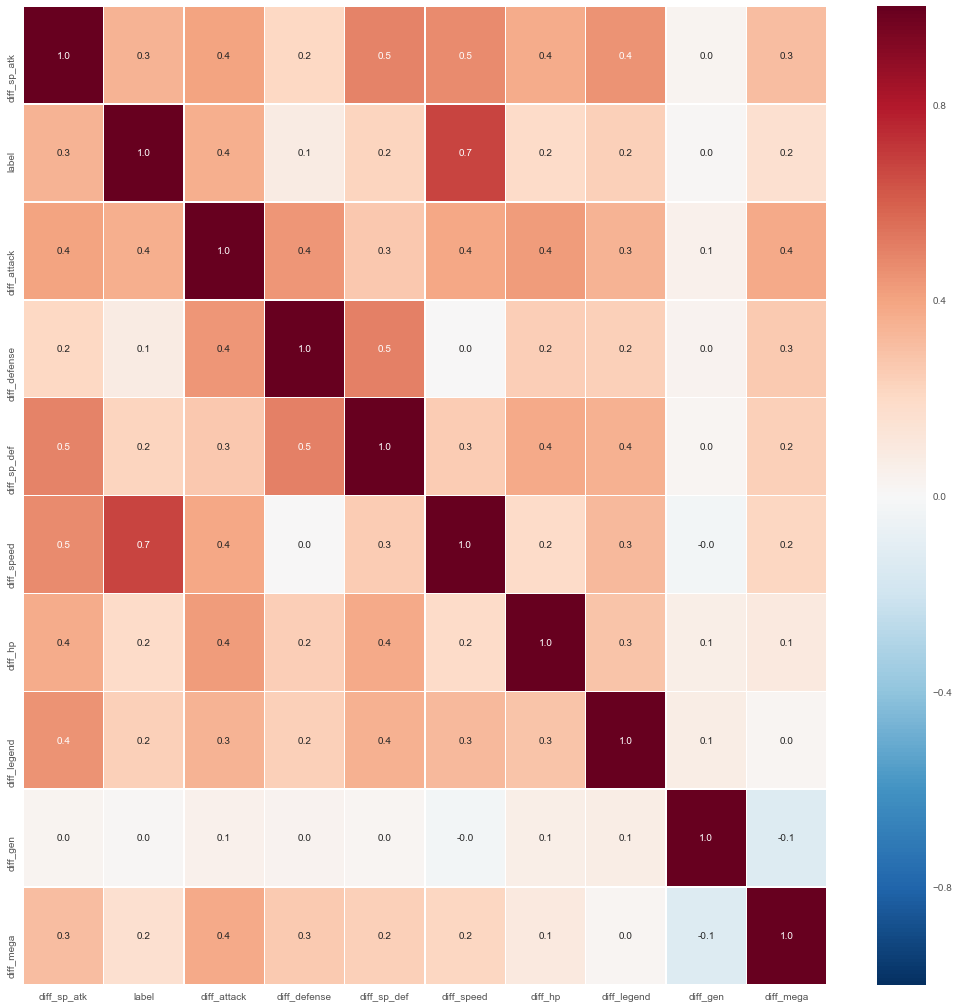

In [392]:
#data visualization

corrset=final._get_numeric_data().columns.values.tolist()
           
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(final[corrset].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

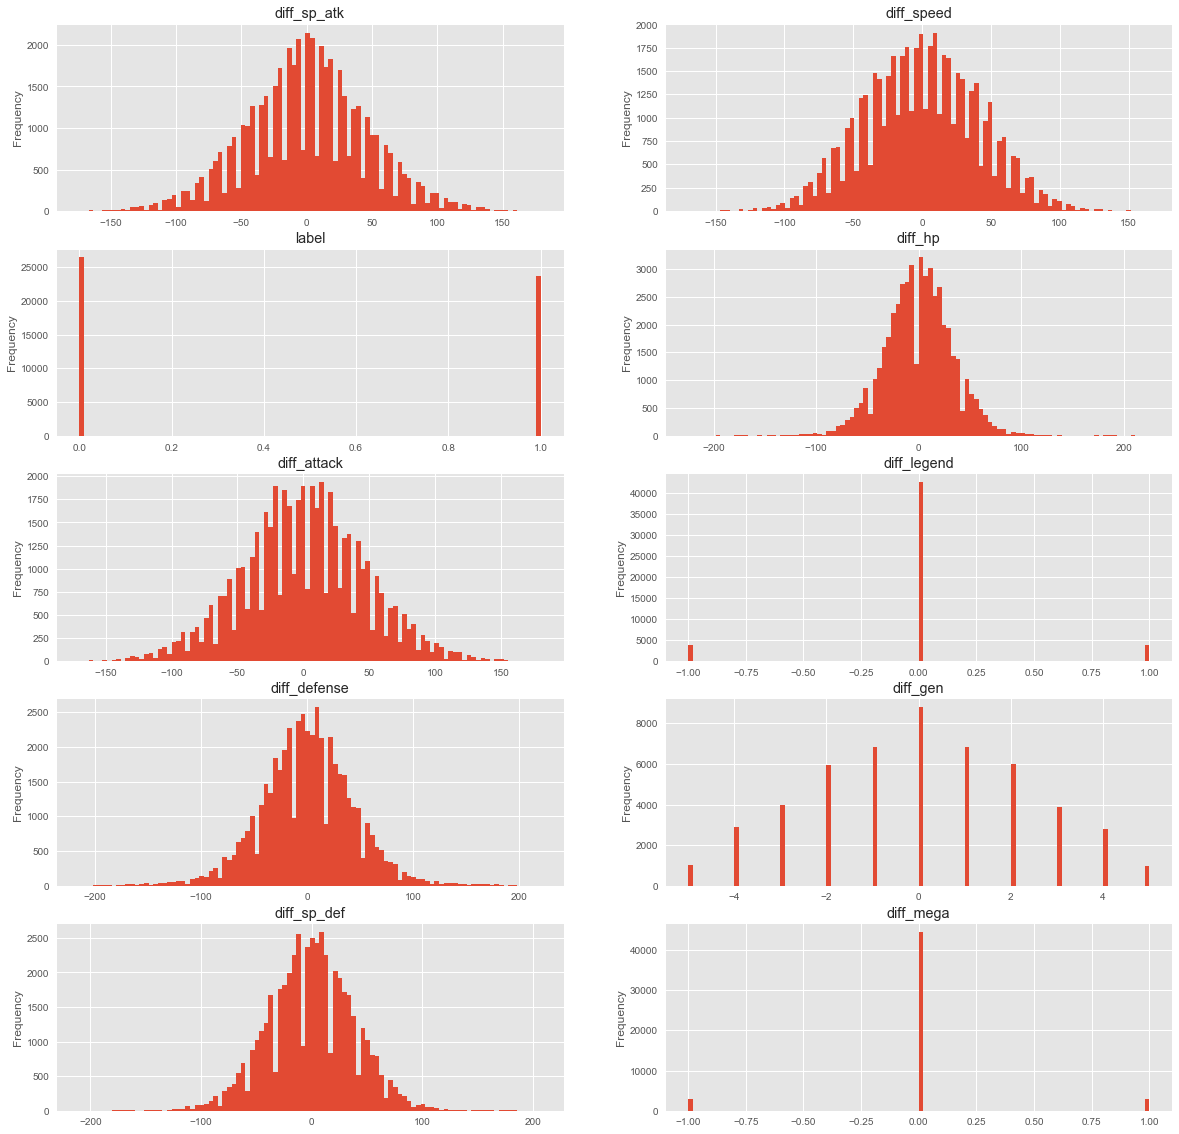

In [393]:
# Lets check the distribution of the variables and relationship with the target variable

fig, axes = plt.subplots(nrows=round(len(corrset)/2), ncols=2,figsize=(20,20))
i=0
j=0
for item in corrset:
    final[item].plot.hist(ax=axes[i,j],bins=100); axes[i,j].set_title(item);
    if i == round(len(corrset)/2)-1: 
        i=0
        j=1
    else: i=i+1

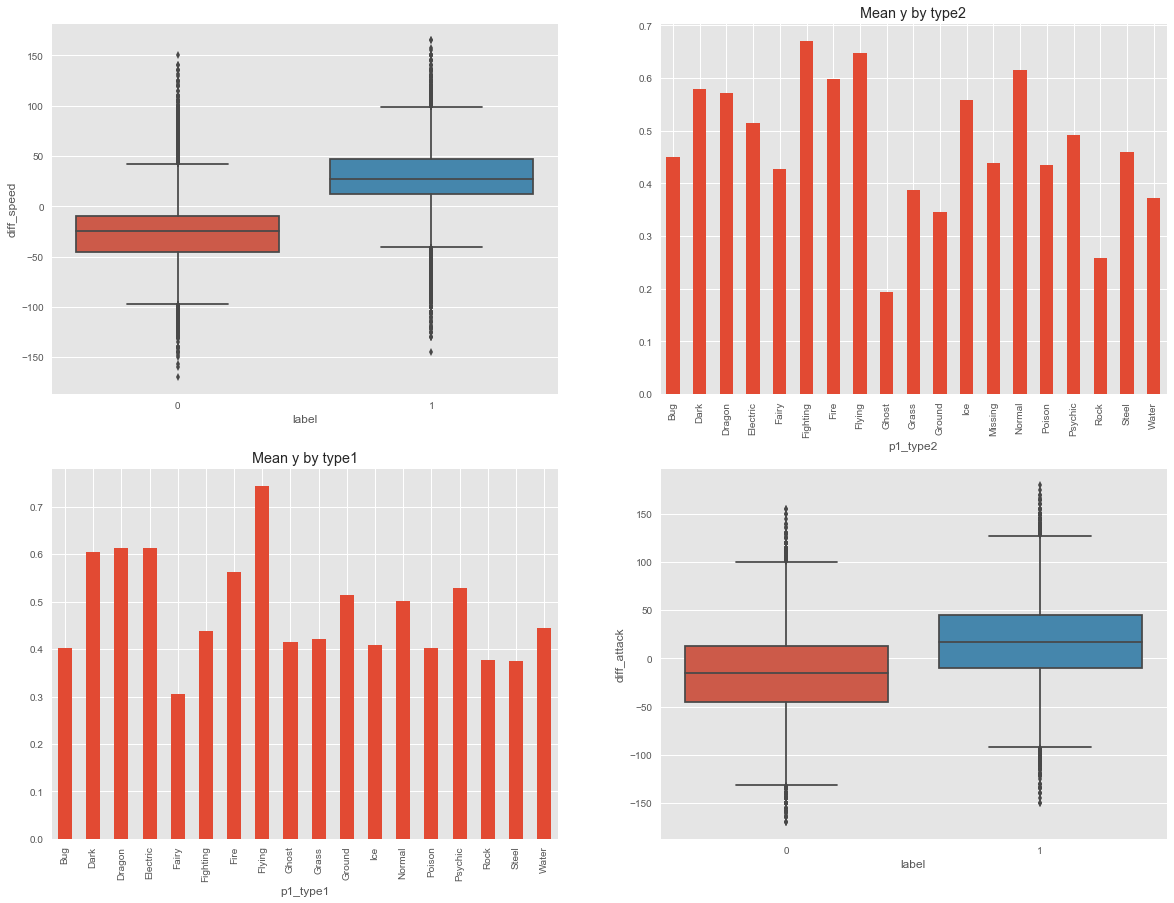

In [394]:
# Define a function for a bar plot

def barplot(df, x , y, title, p , q):
    l=[x,y]
    means = df[l].groupby(x).agg([np.mean, np.std])
    means.columns = means.columns.droplevel()
    means['mean'].plot.bar(title=title,ax=axes[p,q]) 
    
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
sns.boxplot(x="label", y="diff_speed", data=final,ax=axes[0,0])
barplot(final,'p1_type1','label', "Mean y by type1",1,0)
barplot(final,'p1_type2','label', "Mean y by type2",0,1)
sns.boxplot(x="label", y="diff_attack", data=final,ax=axes[1,1])
#barplot(final,'education','label', "Mean y by education",1,1)


In [395]:

# Need to create dummy Values 

dummies=pd.get_dummies(final['p1_type1'],prefix='p1_type_1')
final=pd.concat([final,dummies],axis=1)

dummies=pd.get_dummies(final['p1_type2'],prefix='p1_type_2')
final=pd.concat([final,dummies],axis=1)

dummies=pd.get_dummies(final['p2_type1'],prefix='p2_type_1')
final=pd.concat([final,dummies],axis=1)

dummies=pd.get_dummies(final['p2_type2'],prefix='p2_type_2')
final=pd.concat([final,dummies],axis=1)

colnames=final.columns.values.tolist()

excl=['p1_type1','p1_type2','p2_type1','p2_type2']

retain=list(set(colnames)-set(excl))
print(retain)

final=final[retain]

['p1_type_2_Poison', 'p2_type_2_Electric', 'p2_type_1_Poison', 'p2_type_1_Ghost', 'p1_type_1_Fairy', 'p2_type_2_Steel', 'p2_type_2_Fighting', 'p1_type_2_Electric', 'p1_type_1_Ice', 'p2_type_1_Psychic', 'p1_type_1_Poison', 'p1_type_1_Fire', 'p1_type_1_Fighting', 'p2_type_2_Water', 'p1_type_2_Water', 'p2_type_1_Fire', 'p1_type_2_Ice', 'p2_type_2_Fairy', 'p1_type_2_Dark', 'p2_type_2_Psychic', 'p1_type_1_Dark', 'p2_type_1_Ice', 'p1_type_2_Bug', 'p1_type_2_Dragon', 'p2_type_2_Flying', 'p2_type_2_Missing', 'p2_type_1_Bug', 'p2_type_2_Ghost', 'label', 'p1_type_1_Water', 'p1_type_1_Flying', 'p1_type_1_Ghost', 'p2_type_2_Ground', 'p1_type_1_Dragon', 'p1_type_1_Grass', 'p2_type_2_Rock', 'diff_sp_def', 'p1_type_2_Steel', 'p1_type_2_Fire', 'p1_type_1_Psychic', 'p2_type_1_Fairy', 'p1_type_2_Flying', 'diff_mega', 'p2_type_2_Grass', 'p2_type_1_Ground', 'p1_type_1_Steel', 'p1_type_1_Rock', 'p2_type_1_Electric', 'p2_type_2_Normal', 'p2_type_2_Dark', 'p1_type_2_Fairy', 'p1_type_2_Fighting', 'p1_type_2_N

In [396]:
label=['label']
train_features=list(set(final.columns.values.tolist()) - set(label))

# Split data in test and train

X_train, X_test, y_train, y_test = train_test_split(final[train_features], final[label]
                                                    , test_size=0.3, random_state=123)

In [397]:
# Method 1 - Building model with all features - Logistic


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='f1')

print("f1:", result)
print("Mean f1:", result.mean())
print("Median f1:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

# Even though the accuracy is high precision, recall and F1 for class 1 is low. The AUC is also not so 
# satisfactory 0.68

f1: [ 0.87633769  0.88213043  0.88137658  0.87351779  0.87874206]
Mean f1: 0.87842091003
Median f1: 0.878742062292
Train Accuracy:  0.886514285714
Train AUC:  0.886050884952
             precision    recall  f1-score   support

          0       0.89      0.90      0.89     18397
          1       0.88      0.88      0.88     16603

avg / total       0.89      0.89      0.89     35000

Test Accuracy:  0.891133333333
Test AUC:  0.890441704378
             precision    recall  f1-score   support

          0       0.90      0.90      0.90      8002
          1       0.89      0.88      0.88      6998

avg / total       0.89      0.89      0.89     15000



In [399]:
# Method 1 - Building modesl with all features - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=20,max_depth=10),
                         X_train, y_train, cv=kfold, scoring='f1')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=20,max_depth=10)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))



Accuracy: [ 0.94687546  0.94942904  0.94420082  0.94713127  0.95210929]
Mean Accuracy: 0.947949174997
Median Accuracy: 0.947131270652
Train Accuracy:  0.957685714286
Train AUC:  0.957989791701
             precision    recall  f1-score   support

          0       0.97      0.95      0.96     18397
          1       0.95      0.96      0.96     16603

avg / total       0.96      0.96      0.96     35000

Test Accuracy:  0.9552
Test AUC:  0.955491442944
             precision    recall  f1-score   support

          0       0.96      0.95      0.96      8002
          1       0.94      0.96      0.95      6998

avg / total       0.96      0.96      0.96     15000

